In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
from natasha import Segmenter, MorphVocab, NewsNERTagger, NewsEmbedding, NewsMorphTagger, Doc
from trajectories import trajectory_from_text
from ordec import entropy_complexity
from ordec_borders import *

wdict = np.load('../english_dict.npy', allow_pickle=True).item()
wdict = {word: vec[-8:] for word, vec in wdict.items()}

In [2]:
def split_text(text, num_parts):
    words = text.split()
    part_size = len(words) // num_parts
    parts = []
    for i in range(num_parts):
        start = i * part_size
        end = (i + 1) * part_size if i < num_parts - 1 else None
        parts.append(" ".join(words[start:end]))
    return parts

In [5]:
n, m = 2, 8
results_df_liter = pd.DataFrame(results_liter)

min_ec, max_ec = get_borders(n, m)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df_liter, x='entropy', y='complexity', s=4, color='blue', label='Война и мир')
sns.lineplot(x=min_ec[:, 0], y=min_ec[:, 1], color='r', alpha=.3, label='Теоретические границы')
sns.lineplot(x=max_ec[:, 0], y=max_ec[:, 1], color='r', alpha=.3)
plt.xlim(0.5, 0.8)
plt.ylim(0.43, 0.55)
plt.title("Плоскость Энтропия-Сложность для 'Война и мир'")
plt.xlabel("Энтропия")
plt.ylabel("Сложность")
plt.savefig('Voina_chaos_zoom.png')
plt.legend()
plt.show()

ValueError: Could not interpret value `entropy` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [3]:
lemma_jokes = open('../lemma_eng_jokes.txt', 'r').read()
jokes = lemma_jokes.split('\n\n\n')

In [7]:
results_jokes = []
for i, part in enumerate(tqdm(jokes, desc="Processing parts")):
    ts = trajectory_from_text(part, wdict, m)
    if ts is not None:
        ent, comp = entropy_complexity(ts, n=n, m=m)
        results_jokes.append({
            'part': i + 1,
            'entropy': ent,
            'complexity': comp,
            'text_type': ['lit'],
            'lang' : 'ru',
            'n' : n,
            'm' : m
        })

Processing parts:   0%|          | 0/16052 [00:00<?, ?it/s]

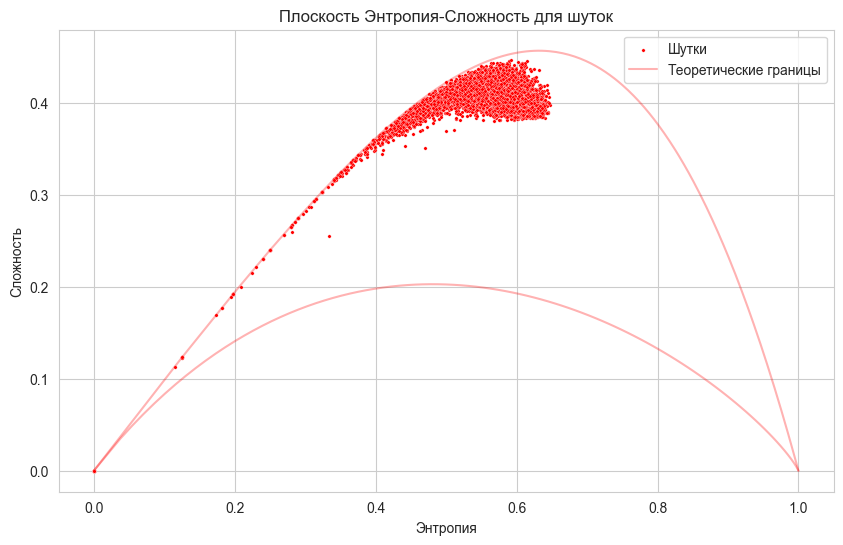

In [8]:
results_df_jokes = pd.DataFrame(results_jokes)

min_ec, max_ec = get_borders(n, m)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df_jokes, x='entropy', y='complexity', s=6, color='red', label='Шутки')
sns.lineplot(x=min_ec[:, 0], y=min_ec[:, 1], color='r', alpha=.3, label='Теоретические границы')
sns.lineplot(x=max_ec[:, 0], y=max_ec[:, 1], color='r', alpha=.3)
# plt.xlim(0.4, 1.0)
plt.title("Плоскость Энтропия-Сложность для шуток")
plt.xlabel("Энтропия")
plt.ylabel("Сложность")
plt.savefig('о.png')
plt.legend()
plt.show()

In [15]:
n, m = 2, 8

results_jokes = []
for i, part in enumerate(tqdm(jokes, desc="Processing parts")):
    ts = trajectory_from_text(part, wdict, m)
    if ts is not None:
        ent, comp = entropy_complexity(ts, n=n, m=m)
        results_jokes.append({
            'part': i + 1,
            'entropy': ent,
            'complexity': comp,
            'text_type': ['lit'],
            'lang' : 'ru',
            'n' : n,
            'm' : m
        })
        
min_ec, max_ec = get_borders(n, m)

with open('../lemma_eng_liter.txt', 'r', encoding='utf-8') as f:
    text = f.read()
num_parts = 11000 #len(jokes)
parts = split_text(text, num_parts)

results_liter_lots = []
for i, part in enumerate(tqdm(parts, desc="Processing parts")):
    ts = trajectory_from_text(part, wdict, m)
    if ts is not None:
        ent, comp = entropy_complexity(ts, n=n, m=m)
        results_liter_lots.append({
            'part': i + 1,
            'entropy': ent,
            'complexity': comp,
            'text_type': ['lit'],
            'lang' : 'ru',
            'n' : n,
            'm' : m
        })
        
results_df_liter_eng = pd.DataFrame(results_liter_lots)

Processing parts:   0%|          | 0/11000 [00:00<?, ?it/s]

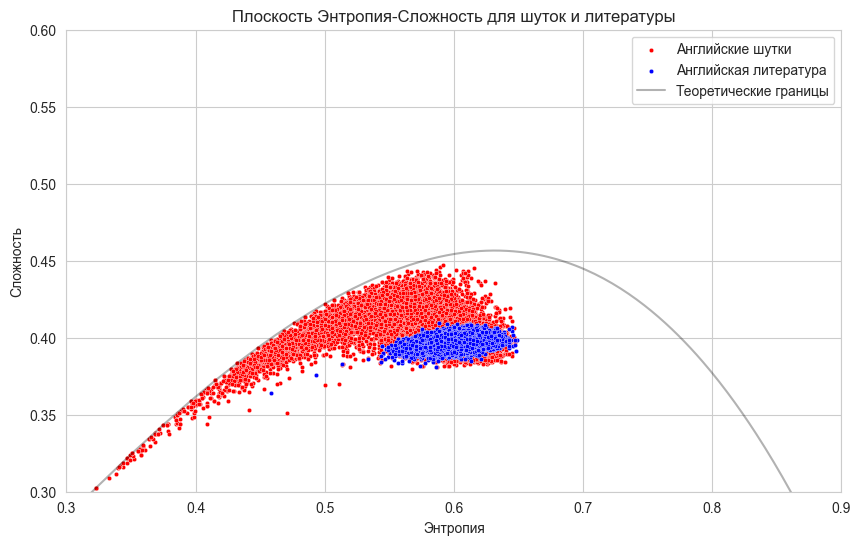

In [16]:
results_df = pd.DataFrame(results_df_liter)

min_ec, max_ec = get_borders(n, m)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df_jokes, x='entropy', y='complexity', s=10, color='red', label='Английские шутки')
sns.scatterplot(data=results_df_liter_eng, x='entropy', y='complexity', s=10, color='blue', label='Английская литература')
sns.lineplot(x=min_ec[:, 0], y=min_ec[:, 1], color='black', alpha=.3, label='Теоретические границы')
sns.lineplot(x=max_ec[:, 0], y=max_ec[:, 1], color='black', alpha=.3)
plt.xlim(0.3, 0.9)
plt.ylim(0.3, 0.6)
plt.title("Плоскость Энтропия-Сложность для шуток и литературы")
plt.xlabel("Энтропия")
plt.ylabel("Сложность")
plt.legend()
plt.show()

Processing parts:   0%|          | 0/16052 [00:00<?, ?it/s]

Processing parts:   0%|          | 0/11000 [00:00<?, ?it/s]

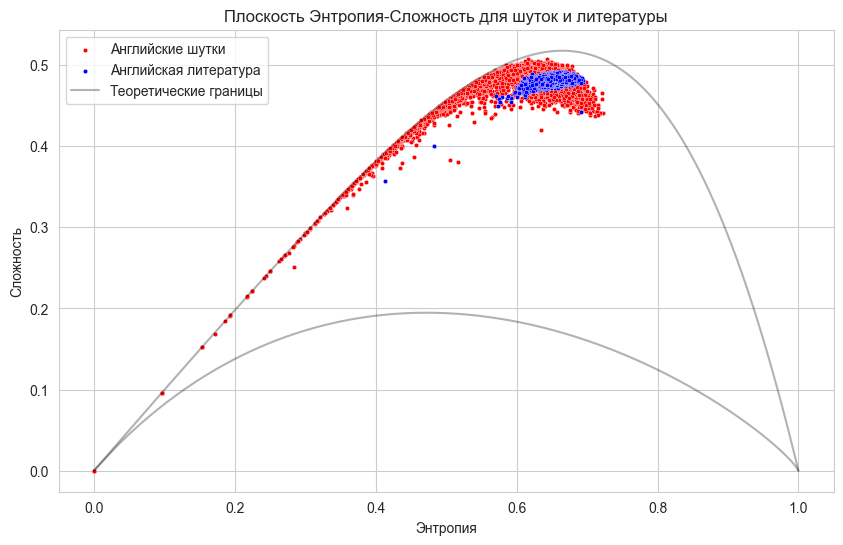

In [13]:
n, m = 3, 4

results_jokes = []
for i, part in enumerate(tqdm(jokes, desc="Processing parts")):
    ts = trajectory_from_text(part, wdict, m)
    if ts is not None:
        ent, comp = entropy_complexity(ts, n=n, m=m)
        results_jokes.append({
            'part': i + 1,
            'entropy': ent,
            'complexity': comp,
            'text_type': ['lit'],
            'lang' : 'ru',
            'n' : n,
            'm' : m
        })
        
min_ec, max_ec = get_borders(n, m)

with open('../lemma_eng_liter.txt', 'r', encoding='utf-8') as f:
    text = f.read()
num_parts = 11000 #len(jokes)
parts = split_text(text, num_parts)

results_liter_lots = []
for i, part in enumerate(tqdm(parts, desc="Processing parts")):
    ts = trajectory_from_text(part, wdict, m)
    if ts is not None:
        ent, comp = entropy_complexity(ts, n=n, m=m)
        results_liter_lots.append({
            'part': i + 1,
            'entropy': ent,
            'complexity': comp,
            'text_type': ['lit'],
            'lang' : 'ru',
            'n' : n,
            'm' : m
        })
        
results_df_liter_eng = pd.DataFrame(results_liter_lots)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df_jokes, x='entropy', y='complexity', s=10, color='red', label='Английские шутки')
sns.scatterplot(data=results_df_liter_eng, x='entropy', y='complexity', s=10, color='blue', label='Английская литература')
sns.lineplot(x=min_ec[:, 0], y=min_ec[:, 1], color='black', alpha=.3, label='Теоретические границы')
sns.lineplot(x=max_ec[:, 0], y=max_ec[:, 1], color='black', alpha=.3)
# plt.xlim(0.3, 0.9)
# plt.ylim(0.3, 0.6)
plt.title("Плоскость Энтропия-Сложность для шуток и литературы")
plt.xlabel("Энтропия")
plt.ylabel("Сложность")
plt.legend()
plt.show()

hdbscan, aptix, алгоритм кластеризации из НИСа. 

Processing parts:   0%|          | 0/16052 [00:00<?, ?it/s]

Processing parts:   0%|          | 0/11000 [00:00<?, ?it/s]

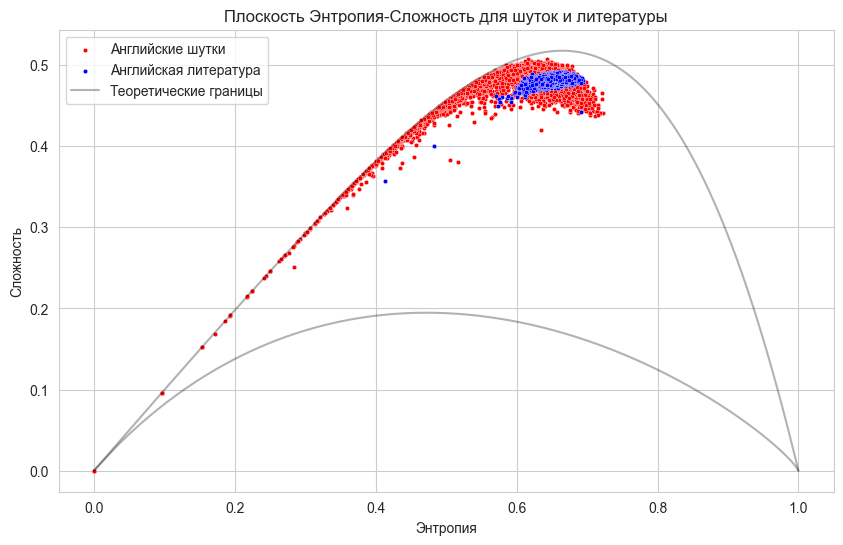

In [15]:
n, m = 3, 4

results_jokes = []
for i, part in enumerate(tqdm(jokes, desc="Processing parts")):
    ts = trajectory_from_text(part, wdict, m)
    if ts is not None:
        ent, comp = entropy_complexity(ts, n=n, m=m)
        results_jokes.append({
            'part': i + 1,
            'entropy': ent,
            'complexity': comp,
            'text_type': ['lit'],
            'lang' : 'ru',
            'n' : n,
            'm' : m
        })
        
min_ec, max_ec = get_borders(n, m)
results_df_jokes = pd.DataFrame(results_jokes)

with open('../lemma_eng_liter.txt', 'r', encoding='utf-8') as f:
    text = f.read()
num_parts = 11000 #len(jokes)
parts = split_text(text, num_parts)

results_liter_lots = []
for i, part in enumerate(tqdm(parts, desc="Processing parts")):
    ts = trajectory_from_text(part, wdict, m)
    if ts is not None:
        ent, comp = entropy_complexity(ts, n=n, m=m)
        results_liter_lots.append({
            'part': i + 1,
            'entropy': ent,
            'complexity': comp,
            'text_type': ['lit'],
            'lang' : 'ru',
            'n' : n,
            'm' : m
        })
        
results_df_liter_eng = pd.DataFrame(results_liter_lots)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df_jokes, x='entropy', y='complexity', s=10, color='red', label='Английские шутки')
sns.scatterplot(data=results_df_liter_eng, x='entropy', y='complexity', s=10, color='blue', label='Английская литература')
sns.lineplot(x=min_ec[:, 0], y=min_ec[:, 1], color='black', alpha=.3, label='Теоретические границы')
sns.lineplot(x=max_ec[:, 0], y=max_ec[:, 1], color='black', alpha=.3)
# plt.xlim(0.3, 0.9)
# plt.ylim(0.3, 0.6)
plt.title("Плоскость Энтропия-Сложность для шуток и литературы")
plt.xlabel("Энтропия")
plt.ylabel("Сложность")
plt.legend()
plt.show()

Processing parts:   0%|          | 0/16052 [00:00<?, ?it/s]

Processing parts:   0%|          | 0/11000 [00:00<?, ?it/s]

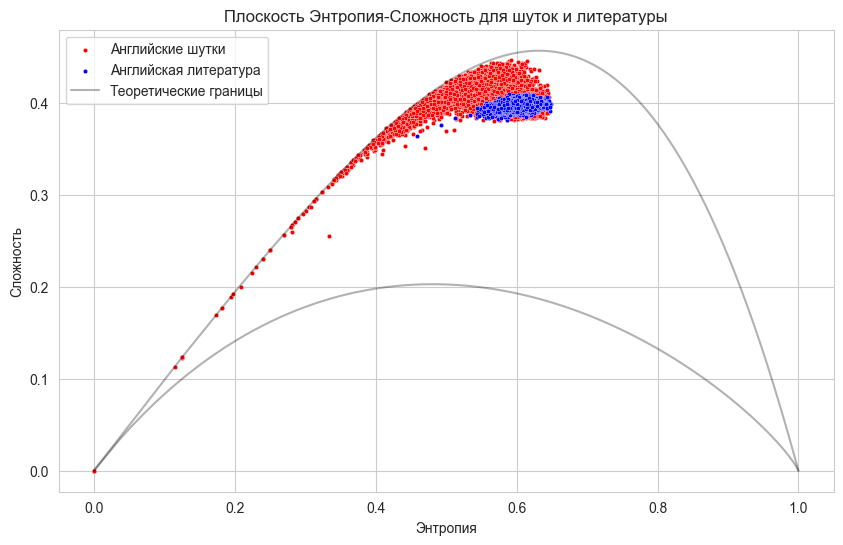

In [20]:
n, m = 2, 8

results_jokes = []
for i, part in enumerate(tqdm(jokes, desc="Processing parts")):
    ts = trajectory_from_text(part, wdict, m)
    if ts is not None:
        ent, comp = entropy_complexity(ts, n=n, m=m)
        results_jokes.append({
            'part': i + 1,
            'entropy': ent,
            'complexity': comp,
            'text_type': ['lit'],
            'lang' : 'ru',
            'n' : n,
            'm' : m
        })
        
min_ec, max_ec = get_borders(n, m)
results_df_jokes = pd.DataFrame(results_jokes)

with open('../lemma_eng_liter.txt', 'r', encoding='utf-8') as f:
    text = f.read()
num_parts = 11000 #len(jokes)
parts = split_text(text, num_parts)

results_liter_lots = []
for i, part in enumerate(tqdm(parts, desc="Processing parts")):
    ts = trajectory_from_text(part, wdict, m)
    if ts is not None:
        ent, comp = entropy_complexity(ts, n=n, m=m)
        results_liter_lots.append({
            'part': i + 1,
            'entropy': ent,
            'complexity': comp,
            'text_type': ['lit'],
            'lang' : 'ru',
            'n' : n,
            'm' : m
        })
        
results_df_liter_eng = pd.DataFrame(results_liter_lots)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df_jokes, x='entropy', y='complexity', s=10, color='red', label='Английские шутки')
sns.scatterplot(data=results_df_liter_eng, x='entropy', y='complexity', s=10, color='blue', label='Английская литература')
sns.lineplot(x=min_ec[:, 0], y=min_ec[:, 1], color='black', alpha=.3, label='Теоретические границы')
sns.lineplot(x=max_ec[:, 0], y=max_ec[:, 1], color='black', alpha=.3)
# plt.xlim(0.3, 0.9)
# plt.ylim(0.3, 0.6)
plt.title("Плоскость Энтропия-Сложность для шуток и литературы")
plt.xlabel("Энтропия")
plt.ylabel("Сложность")
plt.legend()
plt.show()

Processing parts:   0%|          | 0/16052 [00:00<?, ?it/s]

Processing parts:   0%|          | 0/11000 [00:00<?, ?it/s]

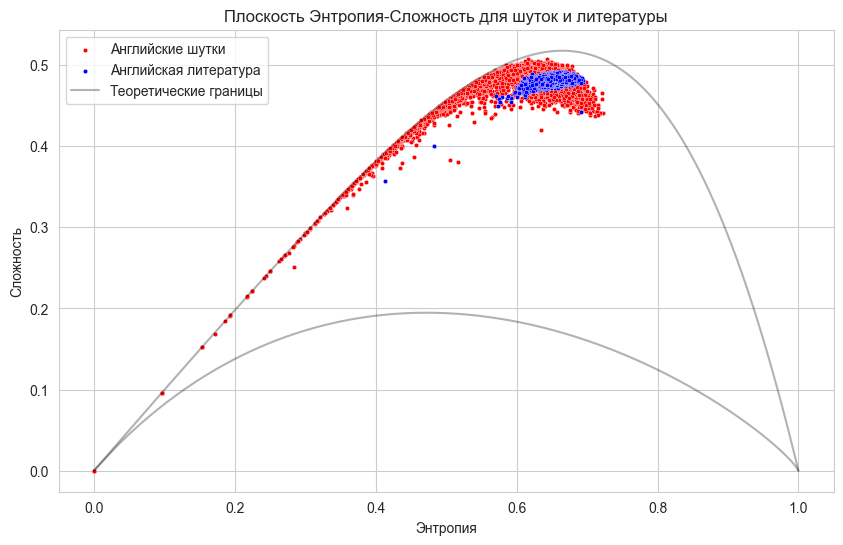

In [19]:
n, m = 3, 4

results_jokes = []
for i, part in enumerate(tqdm(jokes, desc="Processing parts")):
    ts = trajectory_from_text(part, wdict, m)
    if ts is not None:
        ent, comp = entropy_complexity(ts, n=n, m=m)
        results_jokes.append({
            'part': i + 1,
            'entropy': ent,
            'complexity': comp,
            'text_type': ['lit'],
            'lang' : 'ru',
            'n' : n,
            'm' : m
        })
        
min_ec, max_ec = get_borders(n, m)
results_df_jokes = pd.DataFrame(results_jokes)

with open('../lemma_eng_liter.txt', 'r', encoding='utf-8') as f:
    text = f.read()
num_parts = 11000 #len(jokes)
parts = split_text(text, num_parts)

results_liter_lots = []
for i, part in enumerate(tqdm(parts, desc="Processing parts")):
    ts = trajectory_from_text(part, wdict, m)
    if ts is not None:
        ent, comp = entropy_complexity(ts, n=n, m=m)
        results_liter_lots.append({
            'part': i + 1,
            'entropy': ent,
            'complexity': comp,
            'text_type': ['lit'],
            'lang' : 'ru',
            'n' : n,
            'm' : m
        })
        
results_df_liter_eng = pd.DataFrame(results_liter_lots)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df_jokes, x='entropy', y='complexity', s=10, color='red', label='Английские шутки')
sns.scatterplot(data=results_df_liter_eng, x='entropy', y='complexity', s=10, color='blue', label='Английская литература')
sns.lineplot(x=min_ec[:, 0], y=min_ec[:, 1], color='black', alpha=.3, label='Теоретические границы')
sns.lineplot(x=max_ec[:, 0], y=max_ec[:, 1], color='black', alpha=.3)
# plt.xlim(0.3, 0.9)
# plt.ylim(0.3, 0.6)
plt.title("Плоскость Энтропия-Сложность для шуток и литературы")
plt.xlabel("Энтропия")
plt.ylabel("Сложность")
plt.legend()
plt.show()

Processing parts:   0%|          | 0/16052 [00:00<?, ?it/s]

Processing parts:   0%|          | 0/11000 [00:00<?, ?it/s]

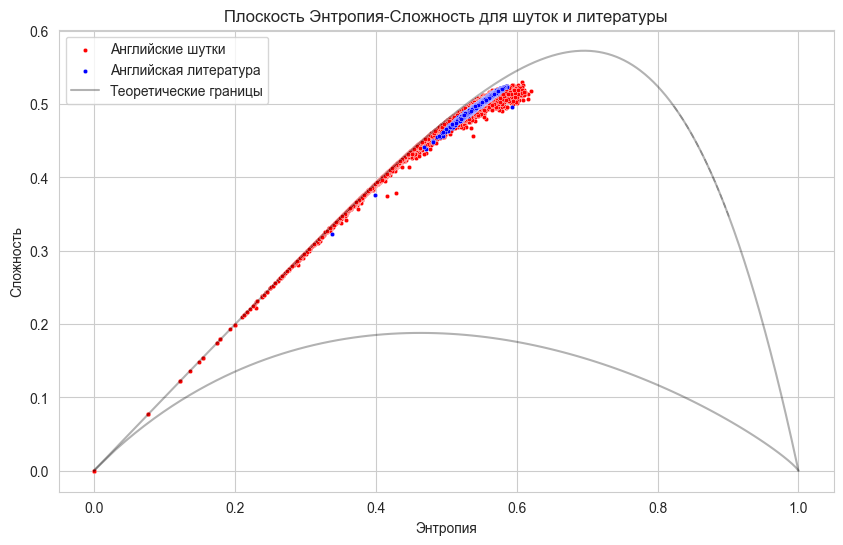

In [21]:
n, m = 3, 5

results_jokes = []
for i, part in enumerate(tqdm(jokes, desc="Processing parts")):
    ts = trajectory_from_text(part, wdict, m)
    if ts is not None:
        ent, comp = entropy_complexity(ts, n=n, m=m)
        results_jokes.append({
            'part': i + 1,
            'entropy': ent,
            'complexity': comp,
            'text_type': ['lit'],
            'lang' : 'ru',
            'n' : n,
            'm' : m
        })
        
min_ec, max_ec = get_borders(n, m)
results_df_jokes = pd.DataFrame(results_jokes)

with open('../lemma_eng_liter.txt', 'r', encoding='utf-8') as f:
    text = f.read()
num_parts = 11000 #len(jokes)
parts = split_text(text, num_parts)

results_liter_lots = []
for i, part in enumerate(tqdm(parts, desc="Processing parts")):
    ts = trajectory_from_text(part, wdict, m)
    if ts is not None:
        ent, comp = entropy_complexity(ts, n=n, m=m)
        results_liter_lots.append({
            'part': i + 1,
            'entropy': ent,
            'complexity': comp,
            'text_type': ['lit'],
            'lang' : 'ru',
            'n' : n,
            'm' : m
        })
        
results_df_liter_eng = pd.DataFrame(results_liter_lots)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df_jokes, x='entropy', y='complexity', s=10, color='red', label='Английские шутки')
sns.scatterplot(data=results_df_liter_eng, x='entropy', y='complexity', s=10, color='blue', label='Английская литература')
sns.lineplot(x=min_ec[:, 0], y=min_ec[:, 1], color='black', alpha=.3, label='Теоретические границы')
sns.lineplot(x=max_ec[:, 0], y=max_ec[:, 1], color='black', alpha=.3)
# plt.xlim(0.3, 0.9)
# plt.ylim(0.3, 0.6)
plt.title("Плоскость Энтропия-Сложность для шуток и литературы")
plt.xlabel("Энтропия")
plt.ylabel("Сложность")
plt.legend()
plt.show()

Processing parts:   0%|          | 0/16052 [00:00<?, ?it/s]

Processing parts:   0%|          | 0/11000 [00:00<?, ?it/s]

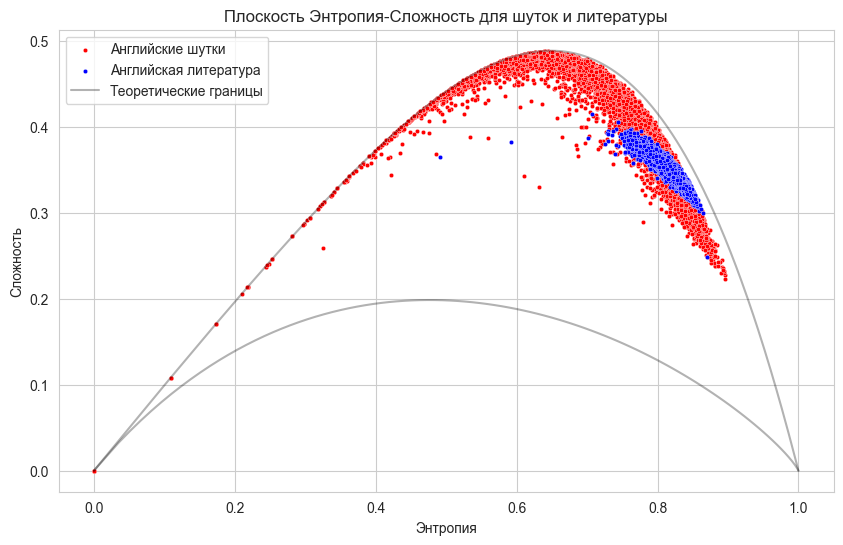

In [22]:
n, m = 4, 2

results_jokes = []
for i, part in enumerate(tqdm(jokes, desc="Processing parts")):
    ts = trajectory_from_text(part, wdict, m)
    if ts is not None:
        ent, comp = entropy_complexity(ts, n=n, m=m)
        results_jokes.append({
            'part': i + 1,
            'entropy': ent,
            'complexity': comp,
            'text_type': ['lit'],
            'lang' : 'ru',
            'n' : n,
            'm' : m
        })
        
min_ec, max_ec = get_borders(n, m)
results_df_jokes = pd.DataFrame(results_jokes)

with open('../lemma_eng_liter.txt', 'r', encoding='utf-8') as f:
    text = f.read()
num_parts = 11000 #len(jokes)
parts = split_text(text, num_parts)

results_liter_lots = []
for i, part in enumerate(tqdm(parts, desc="Processing parts")):
    ts = trajectory_from_text(part, wdict, m)
    if ts is not None:
        ent, comp = entropy_complexity(ts, n=n, m=m)
        results_liter_lots.append({
            'part': i + 1,
            'entropy': ent,
            'complexity': comp,
            'text_type': ['lit'],
            'lang' : 'ru',
            'n' : n,
            'm' : m
        })
        
results_df_liter_eng = pd.DataFrame(results_liter_lots)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df_jokes, x='entropy', y='complexity', s=10, color='red', label='Английские шутки')
sns.scatterplot(data=results_df_liter_eng, x='entropy', y='complexity', s=10, color='blue', label='Английская литература')
sns.lineplot(x=min_ec[:, 0], y=min_ec[:, 1], color='black', alpha=.3, label='Теоретические границы')
sns.lineplot(x=max_ec[:, 0], y=max_ec[:, 1], color='black', alpha=.3)
# plt.xlim(0.3, 0.9)
# plt.ylim(0.3, 0.6)
plt.title("Плоскость Энтропия-Сложность для шуток и литературы")
plt.xlabel("Энтропия")
plt.ylabel("Сложность")
plt.legend()
plt.show()